In [14]:
import nltk
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
training_data = pd.read_csv("s03-dataset/train.csv")
validation_data = pd.read_csv("s03-dataset/test.csv")

In [16]:
df = pd.DataFrame(training_data)
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [18]:
# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words = 'english')

X = df['tweet']
Y = df['label']

X_train = training_data['tweet']
y_train = training_data['label']

In [20]:
# 6. Model Training:
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# 7. Predictions:
X_val = validation_data['tweet']
X_val_tfidf = vectorizer.transform(X_val)

y_pred = model.predict(X_val_tfidf)

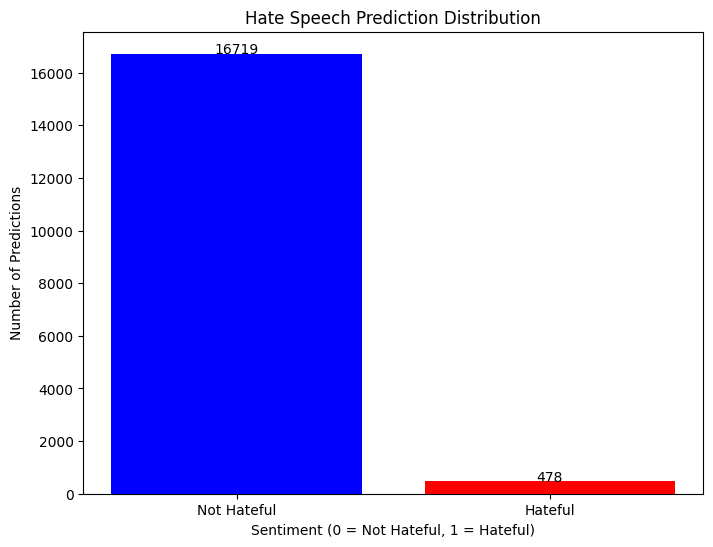

In [23]:
# 8. Visualization
# We have two labels: '0' for not hateful, '1' for hateful
unique_labels, counts = pd.Series(y_pred).value_counts().index, pd.Series(y_pred).value_counts().values

# Create a bar chart
plt.figure(figsize=(8,6))
plt.bar(unique_labels, counts, color=['blue', 'red'])

# Add sentiment counts to bar charts
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.title('Hate Speech Prediction Distribution')
plt.xlabel('Sentiment (0 = Not Hateful, 1 = Hateful)')
plt.ylabel('Number of Predictions')
plt.xticks([0, 1], ['Not Hateful', 'Hateful'])
plt.show()

### Discussion:

> - Reflect on the results: What patterns do you observe in the positive sentiments from Twitter? Are there any predictions that surprise you?
> - paste your code-based and result per code and submit it in pdf format

I noticed that despite the reputation of X (formerly Twitter) for hateful content, the vast majority of posts on this social network are very much not hateful.

Hate-filled content, promoting different kinds of bigotry such as racism and sexism, is concentrated in certain circles, mainly revolving political conversations.

I also saw that the data set primarily considered as hateful content that criticizes and goes into deep discussion regarding socioeconomic statuses and how the less fortunate end up being affected by them. This is sort-of expected; there are unavoidable groups of political influencers that blame these ills on our immutable characteristics.